# Multivariate Regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [4]:
data = pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


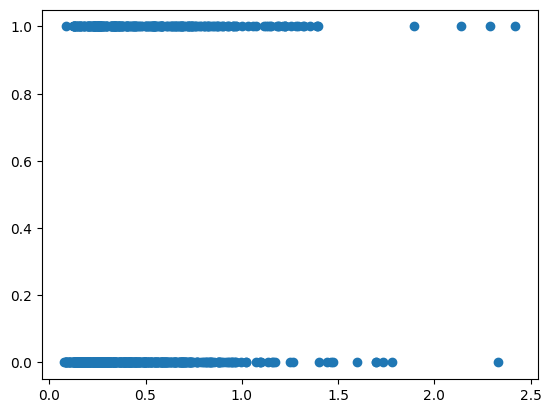

In [5]:
plt.scatter(data.DiabetesPedigreeFunction , data.Outcome)

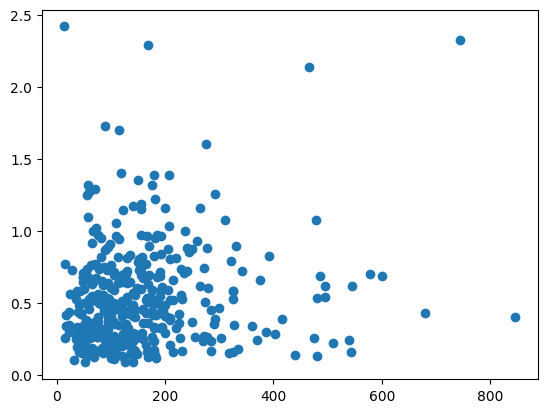

In [6]:
plt.scatter(data[data.Insulin != 0].Insulin , data[data.Insulin !=0].DiabetesPedigreeFunction)

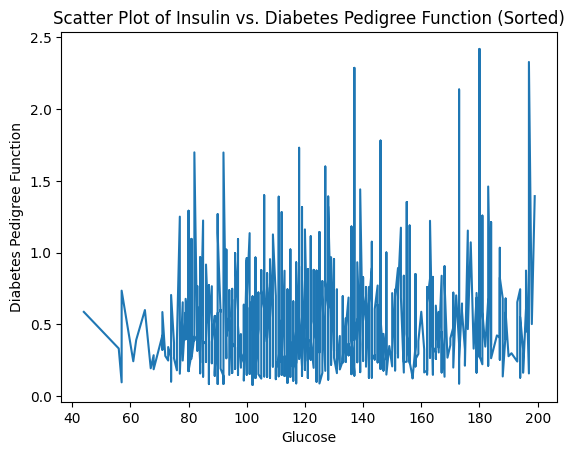

In [7]:
sorted_data = data.sort_values(by='Glucose', ascending=True)
filtered_sorted_data = sorted_data[sorted_data.Glucose != 0]
plt.plot(filtered_sorted_data.Glucose, filtered_sorted_data.DiabetesPedigreeFunction)
plt.xlabel('Glucose')
plt.ylabel('Diabetes Pedigree Function')
plt.title('Scatter Plot of Insulin vs. Diabetes Pedigree Function (Sorted)')
plt.show()


In [8]:
y = data.Outcome
x = data.drop("Outcome",axis=1)

### Data Pre-processing : handling NA Values

In [9]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


There are multiple ways that maybe used to handle the missing values here -> basically here the missing values are zero.
1. just replace the value with the meidan
2. replace the values using a multivariate regression model where the column of the missing values is the key

In [23]:
len(data[data.Insulin == 0].Insulin)
len(data[data.Glucose == 0].Glucose)

5

In [33]:
from statistics import median

median_insulin = median(data.Insulin)
median_glucose = median(data.Glucose)
median_skin_thickness = median(data.SkinThickness)


In [34]:
data.Insulin.replace(0 , median_insulin, inplace=True)
data.Glucose.replace(0 , median_glucose , inplace=True)
data.SkinThickness.replace(0 , median_skin_thickness , inplace=True)

/tmp/ipykernel_6867/3368894054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Glucose.replace(0 , median_glucose , inplace=True)
/tmp/ipykernel_6867/3368894054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [35]:
len(data[data.Insulin == 0].Insulin)

0

In [36]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

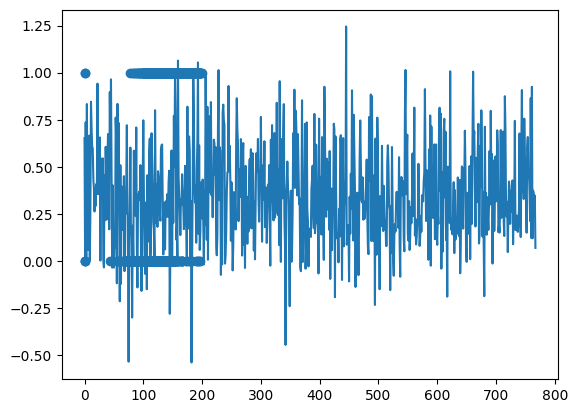

In [43]:
plt.scatter(x.Glucose,y)
plt.plot(reg.predict(x))

## Now i realize that i have been going about it all wrong!!!The dataset i have is a classification dataaset and regression wont work good on it so lets take some other dataset

In [44]:
data = pd.read_csv("hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [ ]:
!pip install word2number

In [57]:
from word2number import w2n

for i in data[data.experience.notna()].experience:
    print(i)
    data.experience[data.experience == i] = w2n.word_to_num(i)

five
two
seven
three
ten
eleven


/tmp/ipykernel_6867/2878172611.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data.experience[data.experience == i] = w2n.word_to_num(i)
/tmp/ipykernel_6867/2878172611.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [58]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [80]:
data.experience.replace(np.nan , median(data[data.experience.notna()].experience),inplace=True)
data['test_score(out of 10)'].replace(np.nan, median(data[data['test_score(out of 10)'].notna()]['test_score(out of 10)']), inplace=True)


/tmp/ipykernel_6867/2952046043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.experience.replace(np.nan , median(data[data.experience.notna()].experience),inplace=True)
/tmp/ipykernel_6867/2952046043.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [81]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [83]:
reg.fit(data.drop("salary($)" , axis=1) , data["salary($)"])

LinearRegression()

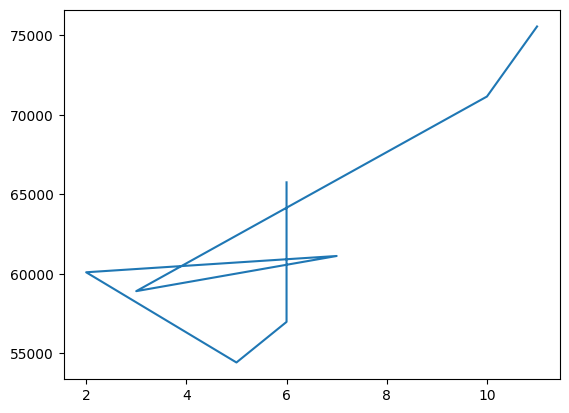

In [86]:
plt.plot(data.experience , reg.predict(data.drop("salary($)" , axis=1)) )

In [87]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


In [88]:
reg.predict([[6 , 10 , 10]])

/src/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71349.59349593])

In [93]:
reg.predict([[1,7,0]])

/src/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24016.2601626])